<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import warnings
warnings.filterwarnings("ignore")

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Your observations here**

+ Entran muchos más registro por el Channel 1
+ Hay sesgo hacia la región 3
+ Hay una desviación anómala en la categoría Fresh
+ Parece que hay outliers en varias categorías



In [5]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

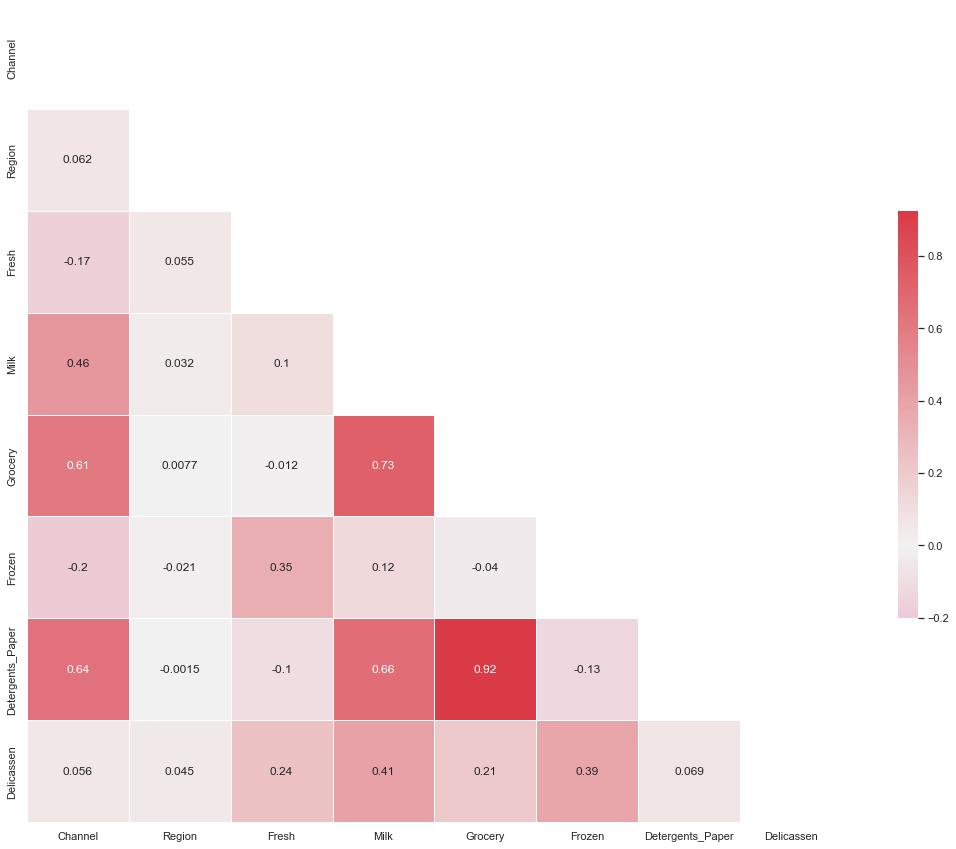

In [8]:
# buscando colinealidad

plt.figure(figsize=(20, 15))

sns.set(style='white')

mask=np.triu(np.ones_like(customers.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(customers.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5, 
          cbar_kws={'shrink': 0.5}); 

In [9]:
# Hay colinealidad entre Grocery y Detergent_Paper

In [10]:
customers.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

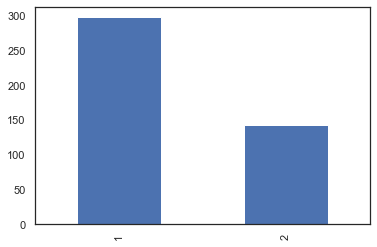

In [11]:
customers.Channel.value_counts().plot(kind = 'bar');

In [12]:
customers.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

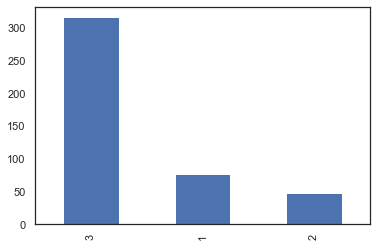

In [13]:
customers.Region.value_counts().plot(kind = 'bar');

In [14]:
customers.Fresh.value_counts()

9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: Fresh, Length: 433, dtype: int64

In [15]:
customers.Milk.value_counts()

3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: Milk, Length: 421, dtype: int64

In [16]:
customers.Grocery.value_counts()

1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: Grocery, Length: 430, dtype: int64

In [17]:
customers.Frozen.value_counts()

2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: Frozen, Length: 426, dtype: int64

In [18]:
customers.Detergents_Paper.value_counts()

118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: Detergents_Paper, Length: 417, dtype: int64

In [19]:
customers.Delicassen.value_counts()

3       4
834     4
548     3
610     3
395     3
       ..
318     1
1450    1
2616    1
929     1
52      1
Name: Delicassen, Length: 403, dtype: int64

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [20]:
# No me deja hacer SMOTE por múltiples errores al intentar importar la libería. Intentado usando instrucciones del sitio oficial

In [21]:
stats = customers.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats.T

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
IQR,1.000000,1.000000,13806.000000,5657.250000,8502.750000,2812.000000,3665.250000,1412.000000


In [22]:
def get_outliers(data):
    
    stats = data.describe().T
    stats['IQR'] = stats['75%']-stats['25%']
    
    outliers = pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr = stats.at[c, 'IQR']

        cut_off = 1.5 * iqr # test tukey

        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off

        res = data[(data[c] < lower) | (data[c] > upper)].copy()

        res['outliers'] = c

        outliers = outliers.append(res, sort=True)

    return outliers

In [23]:
get_outliers(customers)

,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region,outliers
29,1,823,1107,43088,1200,2609,2100,3,Fresh
39,1,2916,212,56159,10002,902,555,3,Fresh
47,2,6465,24171,44466,7782,55571,54259,3,Fresh
52,2,1278,2587,40721,532,5876,3916,3,Fresh
87,1,14351,1579,43265,6312,8117,5025,3,Fresh
...,...,...,...,...,...,...,...,...,...
358,1,4100,536,759,6114,1660,18664,3,Delicassen
372,1,4829,397,3884,876,1641,3801,3,Delicassen
384,1,5120,282,10683,3635,15400,21858,3,Delicassen
409,1,5137,2123,8708,2349,6100,3634,3,Delicassen


In [25]:
outliers = get_outliers(customers)

In [26]:
outliers_index = list(outliers.index)

In [27]:
customers.drop(outliers_index, axis=0, inplace=True)

In [28]:
outliers.groupby('outliers').count()

,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
outliers,,,,,,,,
Delicassen,27,27,27,27,27,27,27,27
Detergents_Paper,30,30,30,30,30,30,30,30
Fresh,20,20,20,20,20,20,20,20
Frozen,43,43,43,43,43,43,43,43
Grocery,24,24,24,24,24,24,24,24
Milk,28,28,28,28,28,28,28,28


In [ ]:
#customers.drop('Grocery', axis=1, inplace=True)

In [ ]:
customers

**Your comment here**

+ Eliminaría Grocery: Es muy genérica y está muy correlacionada con Detergnets_Paper.
+ Haría smote con Channel y Región para eliminar el sesgo.
+ Quitaría Outliers

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [29]:
from sklearn.preprocessing import StandardScaler

customers_scale = customers.copy()
scaler = StandardScaler()
customers_scale[customers_scale.columns] = scaler.fit_transform(customers_scale[customers_scale.columns])

In [30]:
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
3,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
5,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
6,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...
432,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
433,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
434,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
438,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [31]:
from sklearn.cluster import KMeans

df = customers_scale
cols = df.columns # Solo las numéricas, en este caso, todas

kmeans=KMeans(n_clusters=3)

clusters=kmeans.fit(df[cols])

Count the values in `labels`.

In [32]:
len(clusters.cluster_centers_)
labels = clusters.labels_ # Equivalente a preds en el notebook
len(labels)

332

In [33]:
customers['labels'] = labels

In [34]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1


In [35]:
customers.groupby('labels').median()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,1.0,3.0,7769.0,1979.0,2479.0,1389.0,334.0,684.0
1,2.0,3.0,5626.0,7108.0,11238.0,959.0,4882.0,1371.0
2,1.0,1.0,8645.5,1877.5,2538.5,1771.0,379.0,703.5


In [ ]:
# Conclusiones
# Grupo 0: El menor gasto en todas las variables. CLASE BAJA
# Grupo 1: Mucho peso de la vaiable Detergents_Paper, Milk y Delicatessen y todos de canal 2. CLASE ALTA.
# Grupo 2: Bastante peso de Frezh (el 2º) y Frozen (el 2º), bajos en Delicatessen. CLASE MEDIA.

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [52]:
from sklearn.cluster import DBSCAN 

dbscan=DBSCAN(eps=0.5)

dbscan.fit(df)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [53]:
labels_DBSCAN = dbscan.labels_
len(labels_DBSCAN)

332

In [54]:
customers['DBSCAN_labels'] = labels_DBSCAN

In [55]:
customers.groupby('DBSCAN_labels').count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
DBSCAN_labels,,,,,,,,,
-1,308,308,308,308,308,308,308,308,308
0,24,24,24,24,24,24,24,24,24


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [40]:
customers.groupby('labels')['Detergents_Paper'].count()

labels
0    163
1     95
2     74
Name: Detergents_Paper, dtype: int64

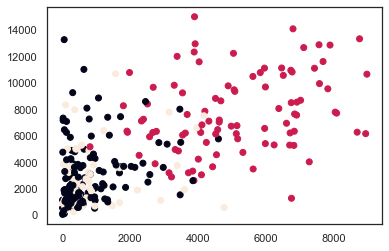

In [41]:
x = customers.Detergents_Paper
y = customers.Milk

plt.scatter(x, y, c = labels);

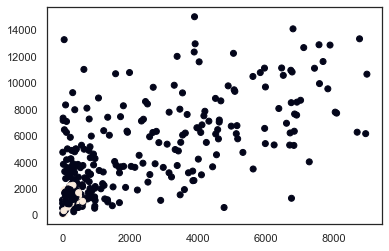

In [56]:
x = customers.Detergents_Paper
y = customers.Milk

plt.scatter(x, y, c = labels_DBSCAN);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

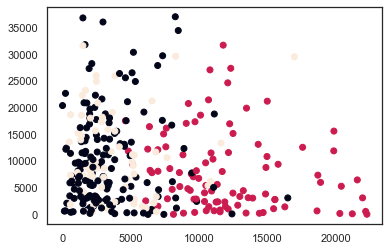

In [43]:
x = customers.Grocery
y = customers.Fresh

plt.scatter(x, y, c = labels);

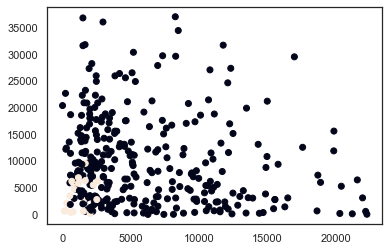

In [57]:
x = customers.Grocery
y = customers.Fresh

plt.scatter(x, y, c = labels_DBSCAN);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

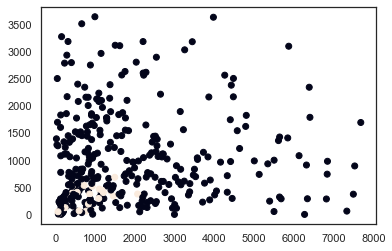

In [58]:
x = customers.Frozen
y = customers.Delicassen

plt.scatter(x, y, c = labels_DBSCAN);

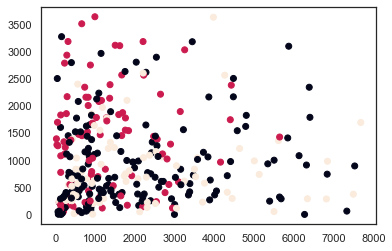

In [46]:
x = customers.Frozen
y = customers.Delicassen

plt.scatter(x, y, c = labels);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [49]:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DBSCAN_labels
labels,,,,,,,,,
0,1.012270,3.000000,10098.840491,2724.803681,3345.380368,1996.742331,684.472393,894.840491,-0.852761
1,1.957895,2.705263,7876.336842,7699.673684,11971.873684,1288.347368,5064.726316,1347.757895,-1.000000
2,1.027027,1.310811,10478.013514,2531.189189,3622.689189,2306.351351,779.216216,859.675676,-1.000000


In [59]:
customers.groupby('DBSCAN_labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
DBSCAN_labels,,,,,,,,,
-1,1.308442,2.503247,9952.808442,4337.454545,6223.438312,1942.230519,2093.649351,1070.172078,0.788961
0,1.000000,3.000000,4344.625000,1124.333333,1411.875000,846.875000,230.666667,329.125000,0.000000


Which algorithm appears to perform better?

In [60]:
# El segundo, los grupos están más diferenciados en CLASE ALTA (grupo -1) y baja (grupo 0).

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

+ 
+ 
+ 
